# IAA primera etapa

En esta notebook vamos a ver cuánto estuvieron de acuerdo los etiquetadores 

Primero, carguemos el excel con las etiquetas

In [1]:
import pandas as pd
import glob
import numpy as np
import re

columns = ["id", "titulo", "FdT", "JxC", "Lavagna", "FIT", "Espert", "Centurión"]
label_cols = columns[2:]

paths = glob.glob("../data/etiquetados_enero_2021/*.xlsx")

dfs = []

annotators = []
title = {}

for path in paths:
    name = path[path.find("(")+1:path.find(")")]
    df = pd.read_excel(
        path,
        names=columns, usecols=range(len(columns)),
    )
    
    annotators.append(name)
    df["anotador"] = name
    dfs.append(df)

annotator_df = pd.concat(dfs).set_index(["anotador", "id"])

idx = pd.MultiIndex.from_product([label_cols, annotators])
df = pd.DataFrame(index=idx)

id2title = dfs[0][["id", "titulo"]].set_index("id").to_dict()["titulo"]


for idx, row in annotator_df.iterrows():
    for col in label_cols:
        if type(row[col]) is str:
            row[col] = row[col].strip().upper()
            
            if row[col] not in {"POS", "NEG", "NEU"}:
                row[col] = float('nan')
                
            df.loc[(col, idx[0]), idx[1]] = row[col]
df

17640 1812  19447 15636 15563 18850 7340  15856 21427 15042  ...  \
FdT       E3   NEU   NEG   NEG   POS   NEU   NaN   NEG   NaN   NaN   NaN  ...   
          JG   POS   NEG   NEG   NEG   POS   NaN   NEG   NaN   NaN   NaN  ...   
          E2   NEU   NEG   NEG   NEG   NEU   NaN   NEG   NaN   NaN   NaN  ...   
JxC       E3   NaN   NEG   NaN   NaN   NaN   NEU   NEG   NEG   NEG   NEU  ...   
          JG   NaN   NEG   POS   POS   NaN   NEU   NEG   NEG   NEG   NEG  ...   
          E2   NaN   NEG   NEG   POS   NaN   NEU   NEG   NaN   NEG   NEG  ...   
Lavagna   E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN   NaN  ...   
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN   NaN  ...   
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NEG   NaN   NaN  ...   
FIT       E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
          JG   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN   NaN   NaN  ...   
          E2   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN   NaN   NaN  ...   
Espert    E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Centurión E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

             21728 778   21726 22429 3803  18853 4892  21375 9577  21828  
FdT       E3   NEU   NEU   NEU   NEU   NaN   NEU   NEG   NaN   NaN   POS  
          JG   POS   NEU   NEU   POS   NaN   NEU   NEG   NaN   NaN   POS  
          E2   POS   NEG   NEU   POS   NaN   NEU   NEU   NaN   NaN   POS  
JxC       E3   NaN   NaN   NaN   NaN   NEU   NaN   NEG   POS   NaN   NaN  
          JG   NaN   NaN   NaN   NaN   POS   NaN   NEG   POS   NaN   NaN  
          E2   NaN   NaN   NaN   NaN   POS   NaN   NEU   POS   NaN   NaN  
Lavagna   E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
FIT       E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN  
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN  
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   POS   NaN  
Espert    E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Centurión E3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          JG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
          E2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[18 rows x 136 columns]

In [2]:
import krippendorff

for label in label_cols:
    print(label)
    mat = df.loc[label].notna().values
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat)
    
    support = (mat.sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


FdT
Alpha sobre etiquetar FdT         : 0.980 (soporte 73)
JxC
Alpha sobre etiquetar JxC         : 0.932 (soporte 72)
Lavagna
Alpha sobre etiquetar Lavagna     : 1.000 (soporte 7)
FIT
Alpha sobre etiquetar FIT         : 0.948 (soporte 15)
Espert
Alpha sobre etiquetar Espert      : 1.000 (soporte 3)
Centurión
Alpha sobre etiquetar Centurión   : 1.000 (soporte 1)


# Agreements

Veamos qué tanto acuerdo hay por cada fuerza. Probemos primero el agreement ordinal (es decir, que es peor decir NEG y POS que NEG y NEU, por ejemplo)

In [3]:
from sklearn.metrics import cohen_kappa_score

for label in label_cols:
    print(label)
    mat = df.loc[label].values
    mat[mat == 'NEG'] = -1
    mat[mat == 'POS'] = 1
    mat[mat == 'NEU'] = 0
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat, level_of_measurement="ordinal")
    
    support = ((~np.isnan(mat)).sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


FdT
Alpha sobre etiquetar FdT         : 0.738 (soporte 73)
JxC
Alpha sobre etiquetar JxC         : 0.780 (soporte 72)
Lavagna
Alpha sobre etiquetar Lavagna     : 0.404 (soporte 7)
FIT
Alpha sobre etiquetar FIT         : 0.749 (soporte 15)
Espert
Alpha sobre etiquetar Espert      : 0.417 (soporte 3)
Centurión
Alpha sobre etiquetar Centurión   : nan (soporte 1)


/home/jmperez/.pyenv/versions/3.8.5/lib/python3.8/site-packages/krippendorff/krippendorff.py:273: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (o * d).sum() / (e * d).sum()


Con match exacto

In [4]:
from sklearn.metrics import cohen_kappa_score

for label in label_cols:
    print(label)
    mat = df.loc[label].values
    mat[mat == 'NEG'] = -1
    mat[mat == 'POS'] = 1
    mat[mat == 'NEU'] = 0
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat, level_of_measurement="nominal")
    
    support = ((~np.isnan(mat)).sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


FdT
Alpha sobre etiquetar FdT         : 0.668 (soporte 73)
JxC
Alpha sobre etiquetar JxC         : 0.667 (soporte 72)
Lavagna
Alpha sobre etiquetar Lavagna     : 0.403 (soporte 7)
FIT
Alpha sobre etiquetar FIT         : 0.625 (soporte 15)
Espert
Alpha sobre etiquetar Espert      : 0.200 (soporte 3)
Centurión
Alpha sobre etiquetar Centurión   : nan (soporte 1)


Bastante bien!

,7340,7896,15707,22461,5678,4783,17094,21786,3085,7794,485,10407,12891,2240,9577
E3,NaN,NEU,POS,POS,POS,NEG,NEU,NEU,NEG,NEU,POS,POS,POS,NEU,POS
JG,POS,NEU,NaN,POS,POS,NEG,NEU,POS,NEG,POS,POS,POS,POS,NEU,POS
E2,POS,NEU,POS,POS,NEU,NEG,NEU,NEU,NEG,NEU,NEU,POS,POS,NEG,POS


,E3,JG,E2,titulo
7340,NaN,POS,POS,La Izquierda realizó un acto en la 9 de Julio ...
7896,NEU,NEU,NEU,Salta: votaron Pablo López y Daniela Planes de...
15707,POS,NaN,POS,Varela: gran elección de la izquierda en Centr...
22461,POS,POS,POS,Votó Alejandro Vilca y aseguró que “la izquier...
5678,POS,POS,NEU,[VIDEO] Nicolás del Caño presenta su libro en ...
4783,NEG,NEG,NEG,Exclusivo: ¿por qué se “indigestó” Espert con ...
17094,NEU,NEU,NEU,"Con el resultado cantado, la izquierda apunta ..."
21786,NEU,POS,NEU,Elecciones 2019: si Alberto Fernández gana “no...
3085,NEG,NEG,NEG,San Luis: proscriben al candidato a intendente...
7794,NEU,POS,NEU,La izquierda se movilizó con críticas al peron...


In [27]:

def anyone_annotated(label):
    party_df = df.loc[label]
    party_df = party_df[party_df.columns[party_df.notna().any()]].T

    titles = [id2title[id] for id in party_df.index]
    party_df["titulo"] = titles
    
    order = ["titulo"] + list(party_df.columns.difference(["titulo"]))
    return party_df[order]

anyone_annotated("Espert")

,titulo,E2,E3,JG
4783,Exclusivo: ¿por qué se “indigestó” Espert con ...,NEU,POS,NEG
20724,"Espert, a los gritos, retó a sus fans: les dij...",NEG,NEG,NEG
20871,Espert trata a votantes de “mugre” y dice a su...,NEG,NEG,NEG


In [28]:

anyone_annotated("FIT")

,titulo,E2,E3,JG
7340,La Izquierda realizó un acto en la 9 de Julio ...,POS,NaN,POS
7896,Salta: votaron Pablo López y Daniela Planes de...,NEU,NEU,NEU
15707,Varela: gran elección de la izquierda en Centr...,POS,POS,NaN
22461,Votó Alejandro Vilca y aseguró que “la izquier...,POS,POS,POS
5678,[VIDEO] Nicolás del Caño presenta su libro en ...,NEU,POS,POS
4783,Exclusivo: ¿por qué se “indigestó” Espert con ...,NEG,NEG,NEG
17094,"Con el resultado cantado, la izquierda apunta ...",NEU,NEU,NEU
21786,Elecciones 2019: si Alberto Fernández gana “no...,NEU,NEU,POS
3085,San Luis: proscriben al candidato a intendente...,NEG,NEG,NEG
7794,La izquierda se movilizó con críticas al peron...,NEU,NEU,POS


In [29]:
anyone_annotated("Centurión")

,titulo,E2,E3,JG
18999,Candidato a gobernador del Frente NOS pide vot...,NEG,NEG,NEG


## Matrices de confusión para FdT

In [52]:
from sklearn.metrics import confusion_matrix
label = "FdT"
idx1 = "E2"
idx2 = "E3"

party_df = df.loc[label].loc[[idx1, idx2]]
    
labeled = party_df.notna().all()
    
sub_df = party_df[party_df.columns[labeled]]

cm = confusion_matrix(sub_df.loc[idx1], sub_df.loc[idx2], labels=["NEG", "NEU", "POS"])

labels = ["NEG", "NEU", "POS"]
dd = pd.DataFrame(cm, columns=[f"{l}_{idx2}" for l in labels])


,NEG_E3,NEU_E3,POS_E3
0,14,6,2
1,1,20,5
2,1,3,20


['E3', 'JG', 'E2']

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

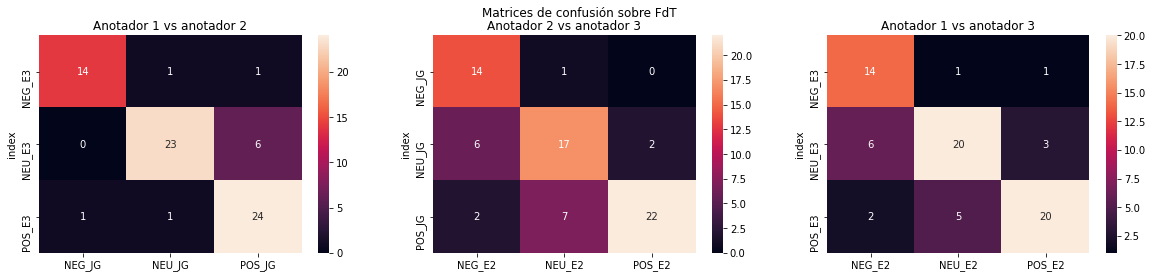

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["NEG", "NEU", "POS"]

def conf_matrix(label, idx1, idx2):
    idx1 = annotators[idx1]
    idx2 = annotators[idx2]
    party_df = df.loc[label].loc[[idx1, idx2]]
    
    labeled = party_df.notna().all()
    
    sub_df = party_df[party_df.columns[labeled]]
    cm = confusion_matrix(sub_df.loc[idx1], sub_df.loc[idx2], labels=labels)

    dd = pd.DataFrame(cm, columns=[f"{l}_{idx2}" for l in labels])
    dd["index"] = [f"{l}_{idx1}" for l in labels]
    dd.set_index("index", inplace=True)
    
    return dd


label = "FdT"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True)

A ver, anotador 1 y anotador 2 parecen matchear bastante.

Fijémonos igual ese cuadrante de NEU para 2 y POS para 1

## Matrices de confusión para JxC

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

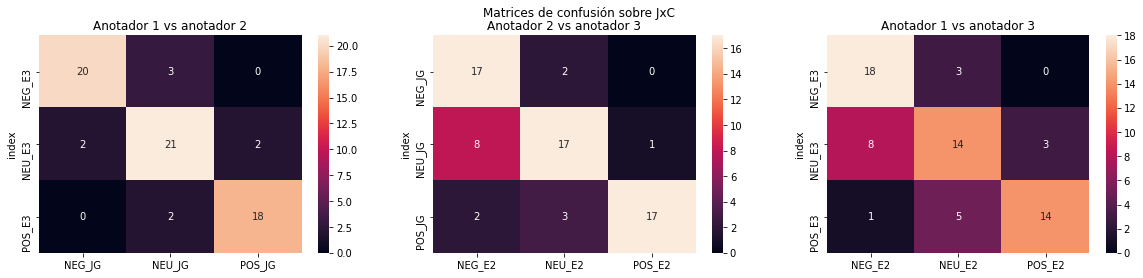

In [60]:
label = "JxC"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True)

# FIT


<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

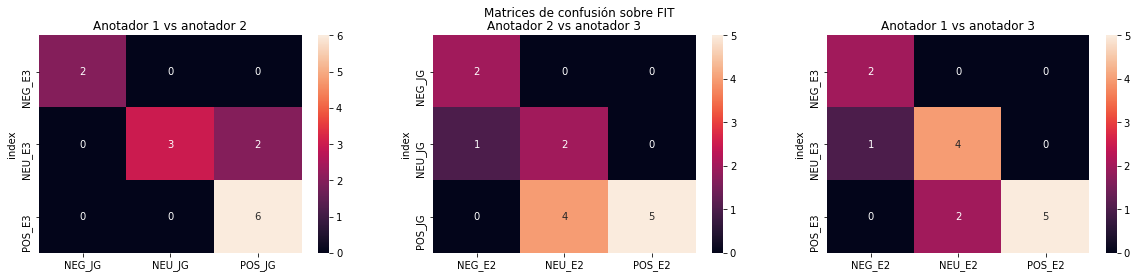

In [61]:
label = "FIT"

fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True)

No mucho que decir

## Lavagna

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

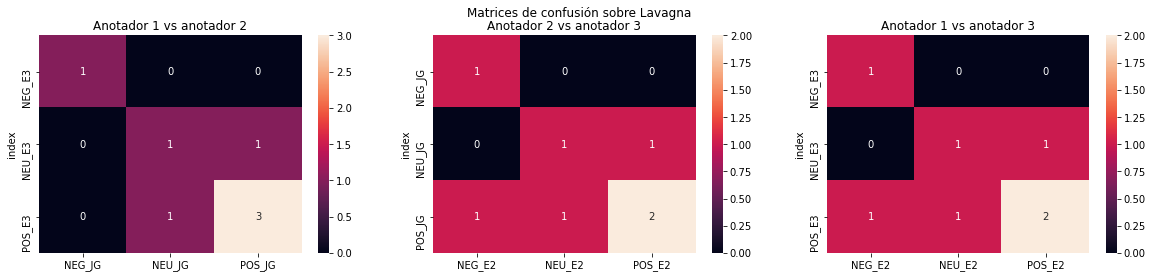

In [62]:
label = "Lavagna"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True)